In [ ]:
!pip install kaggle

In [ ]:
!mkdir kaggle

In [ ]:
import json
token = {"username":"prabhatale","key":"ddd81a0fac3953e034f8b761fb28b3ab"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /content/kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gauravneupane/nepali-rupees-collection -p /content

100% 5.01G/5.01G [02:16<00:00, 65.3MB/s]
100% 5.01G/5.01G [02:16<00:00, 39.3MB/s]


In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/nepali-rupees-collection.zip')
archive.extractall('/content/')

In [ ]:
train_dir = "/content/dataset/train"
valid_dir = "/content/dataset/valid"
categories = ['fifty','five','fivehundred','hundred','ten','thousand','twenty']

In [ ]:
# Counting the number of image in each train and valid directory.
import os
for category in categories:
  print("There are {} {} training images".format(len(os.listdir(os.path.join(train_dir,category))),category))

There are 2579 fifty training images
There are 1499 five training images
There are 2357 fivehundred training images
There are 2478 hundred training images
There are 3019 ten training images
There are 2423 thousand training images
There are 2537 twenty training images


In [ ]:
for category in categories:
  print("There are {} {} training images".format(len(os.listdir(os.path.join(valid_dir,category))),category))

There are 515 fifty training images
There are 501 five training images
There are 501 fivehundred training images
There are 521 hundred training images
There are 445 ten training images
There are 501 thousand training images
There are 350 twenty training images


In [ ]:
# Getting 5 images of each from seven classes
def extract_images(data_dir,no):
  img_paths = []
  for category in categories:
    i = 0
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
      i+= 1
      if i > no:
        break
      img_paths.append(os.path.join(path,img))
  return img_paths

In [ ]:
training_image_paths = extract_images(train_dir,5)
print(training_image_paths)
print(len(training_image_paths))

['/content/dataset/train/fifty/fifty_train_575.jpg', '/content/dataset/train/fifty/fifty_train_1159.jpg', '/content/dataset/train/fifty/fifty_train_767.jpg', '/content/dataset/train/fifty/nepal-50-rupees-2012---everest-mount--himalyan-tahr-p-image-100308-grande - Copy (6) - Copy.jpg', '/content/dataset/train/fifty/fifty_train_660.jpg', '/content/dataset/train/five/five_train_1635.jpg', '/content/dataset/train/five/five_train_609.jpg', '/content/dataset/train/five/five_train_919.jpg', '/content/dataset/train/five/five_train_436.jpg', '/content/dataset/train/five/five_train_1528.jpg', '/content/dataset/train/fivehundred/fivehun_train_381.jpg', '/content/dataset/train/fivehundred/Compressed_IMG_20180717_115047_1.jpg', '/content/dataset/train/fivehundred/fivehun_train_1549.jpg', '/content/dataset/train/fivehundred/fivehun_train_917.jpg', '/content/dataset/train/fivehundred/fivehun_train_571.jpg', '/content/dataset/train/hundred/Compressed_IMG_20181009_133514.jpg', '/content/dataset/train/h

In [ ]:
validation_image_paths = extract_images(valid_dir,5)
print(validation_image_paths)
print(len(validation_image_paths))

['/content/dataset/valid/fifty/fifty_valid_408.jpg', '/content/dataset/valid/fifty/fifty_valid_432.jpg', '/content/dataset/valid/fifty/fifty_valid_207.jpg', '/content/dataset/valid/fifty/fifty_valid_23.jpg', '/content/dataset/valid/fifty/fifty_valid_113.jpg', '/content/dataset/valid/five/five_valid_456.jpg', '/content/dataset/valid/five/five_valid_458.jpg', '/content/dataset/valid/five/five_valid_312.jpg', '/content/dataset/valid/five/five_valid_75.jpg', '/content/dataset/valid/five/five_valid_387.jpg', '/content/dataset/valid/fivehundred/fivehun_valid_59.jpg', '/content/dataset/valid/fivehundred/fivehun_valid_275.jpg', '/content/dataset/valid/fivehundred/fivehun_valid_259.jpg', '/content/dataset/valid/fivehundred/fivehun_valid_126.jpg', '/content/dataset/valid/fivehundred/fivehun_valid_65.jpg', '/content/dataset/valid/hundred/hundred_valid_442.jpg', '/content/dataset/valid/hundred/hundred_valid_425.jpg', '/content/dataset/valid/hundred/hundred_valid_353.jpg', '/content/dataset/valid/h

In [ ]:
# Visualizing the training and validation images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def visualize_images(images_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  rows = rows
  cols = cols
  for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_array = mpimg.imread(images_path[i-1])
    plt.imshow(img_array)
  plt.show()

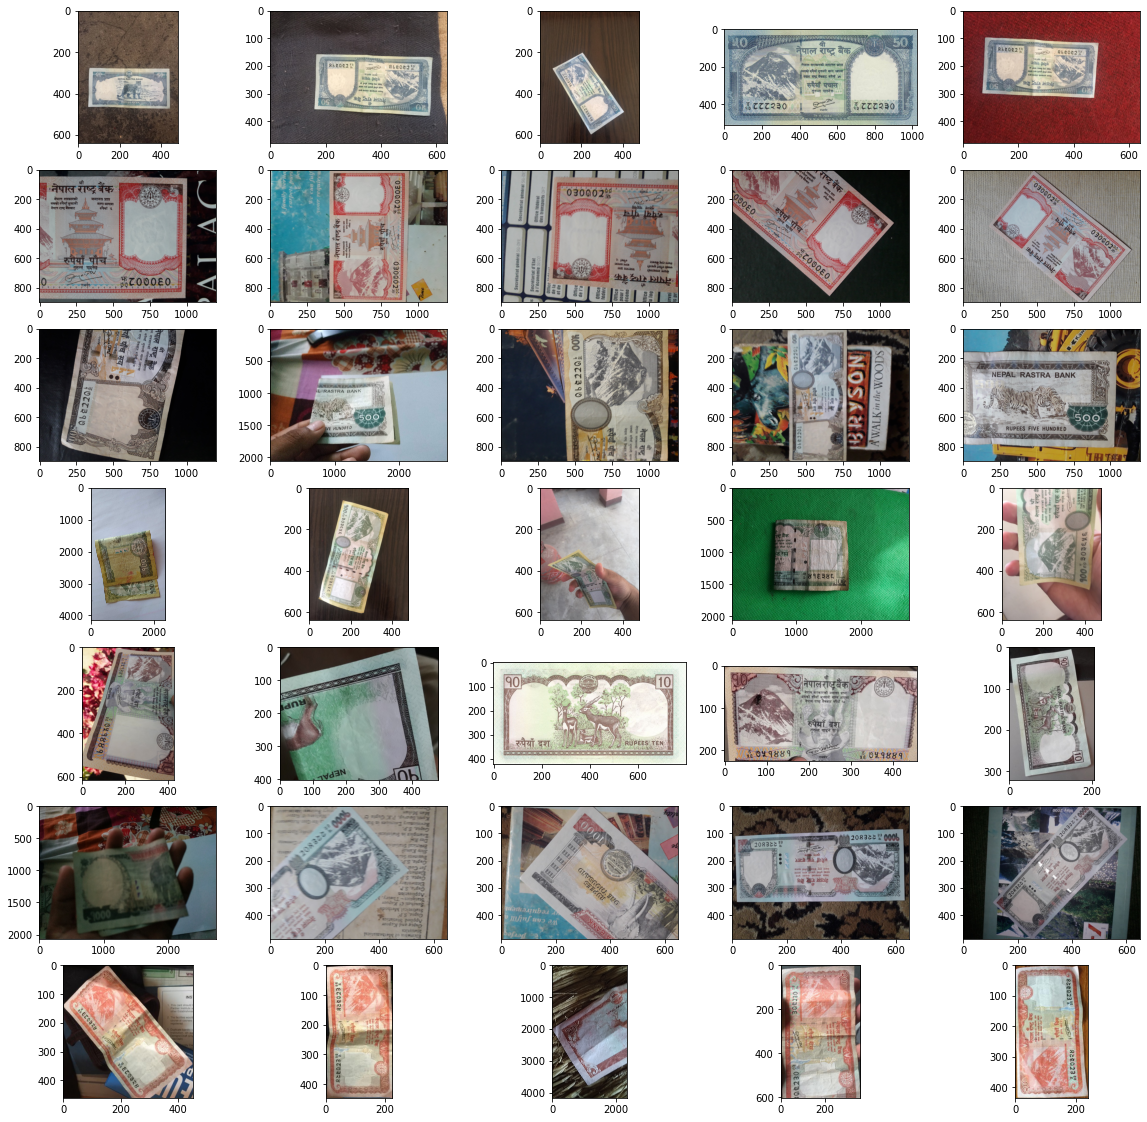

In [ ]:
# Visualizing Training Images
visualize_images(training_image_paths,7,5)

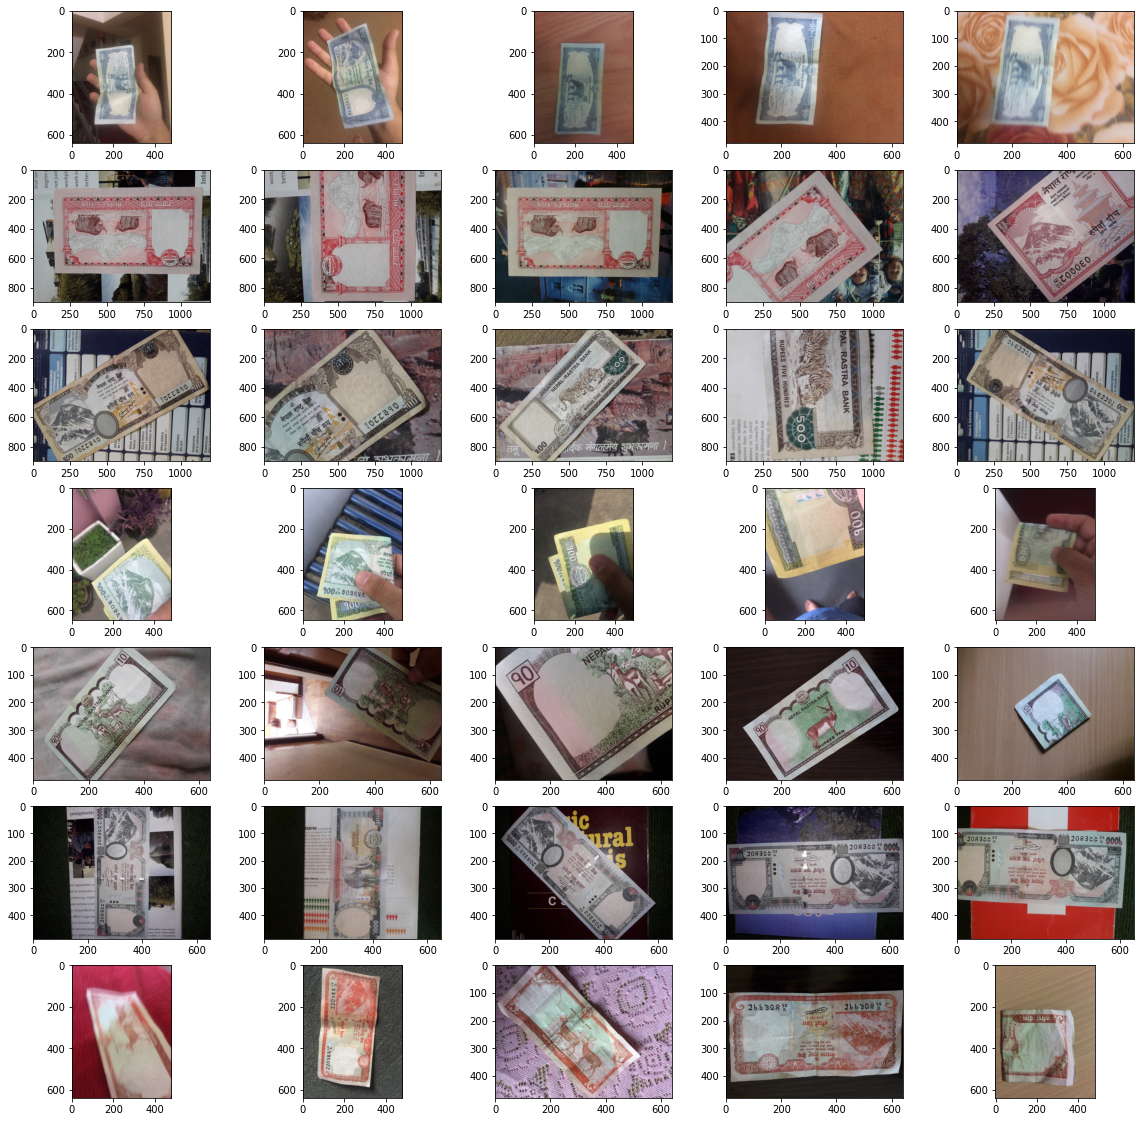

In [ ]:
# Visualizing the validation images
visualize_images(validation_image_paths,7,5)

In [ ]:
import cv2
def change_shape(data_dir):
  for category in categories:
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(os.path.join(path,img)))
      resized_img_array = cv2.resize(img_array,(224,224))
      cv2.imwrite(os.path.join(path,img),resized_img_array)

In [ ]:
change_shape(data_dir= train_dir)

In [ ]:
change_shape(data_dir = valid_dir)

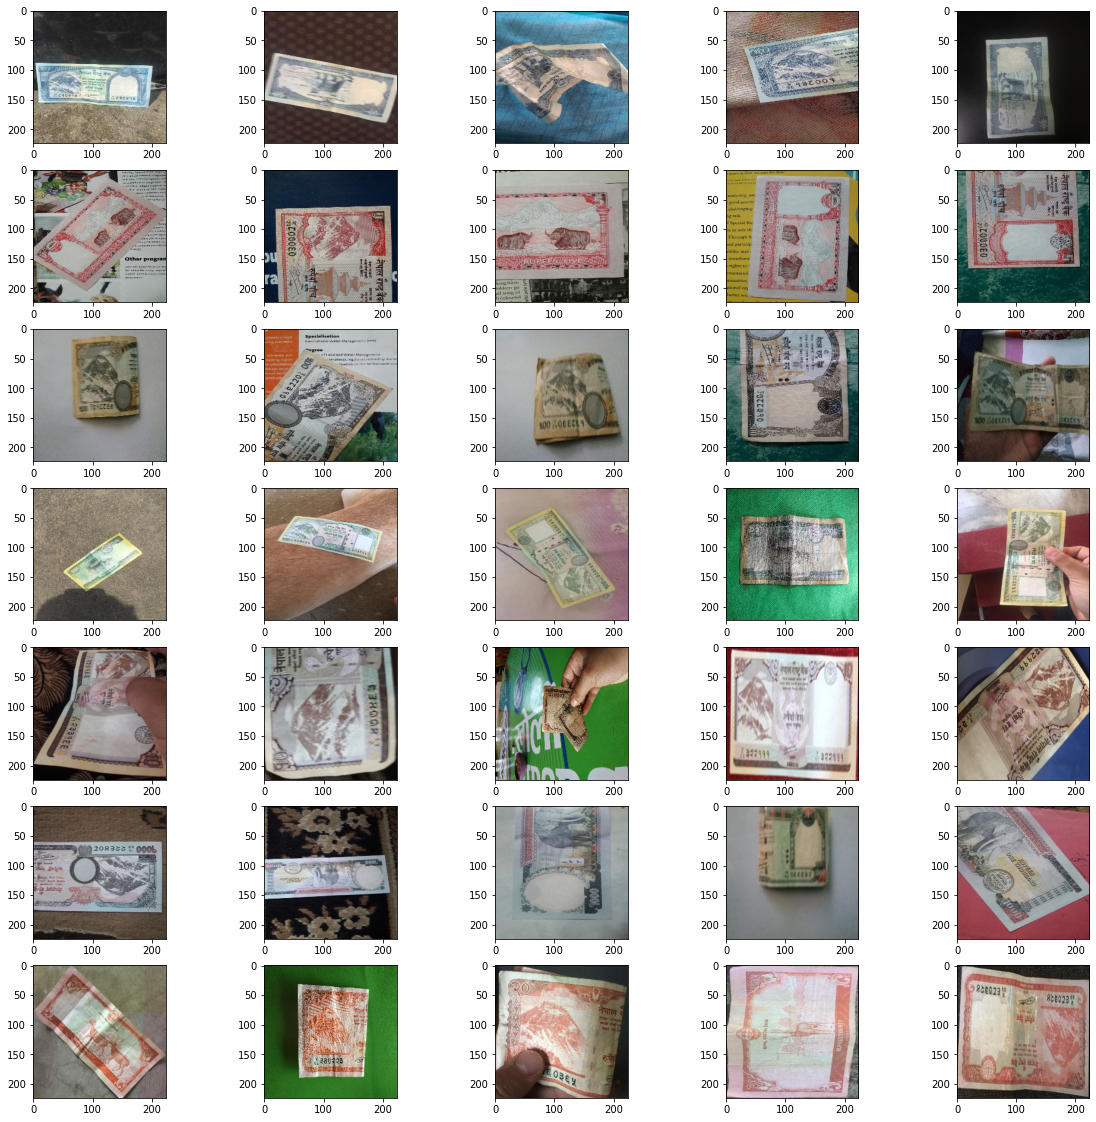

In [ ]:
visualize_images(training_image_paths)

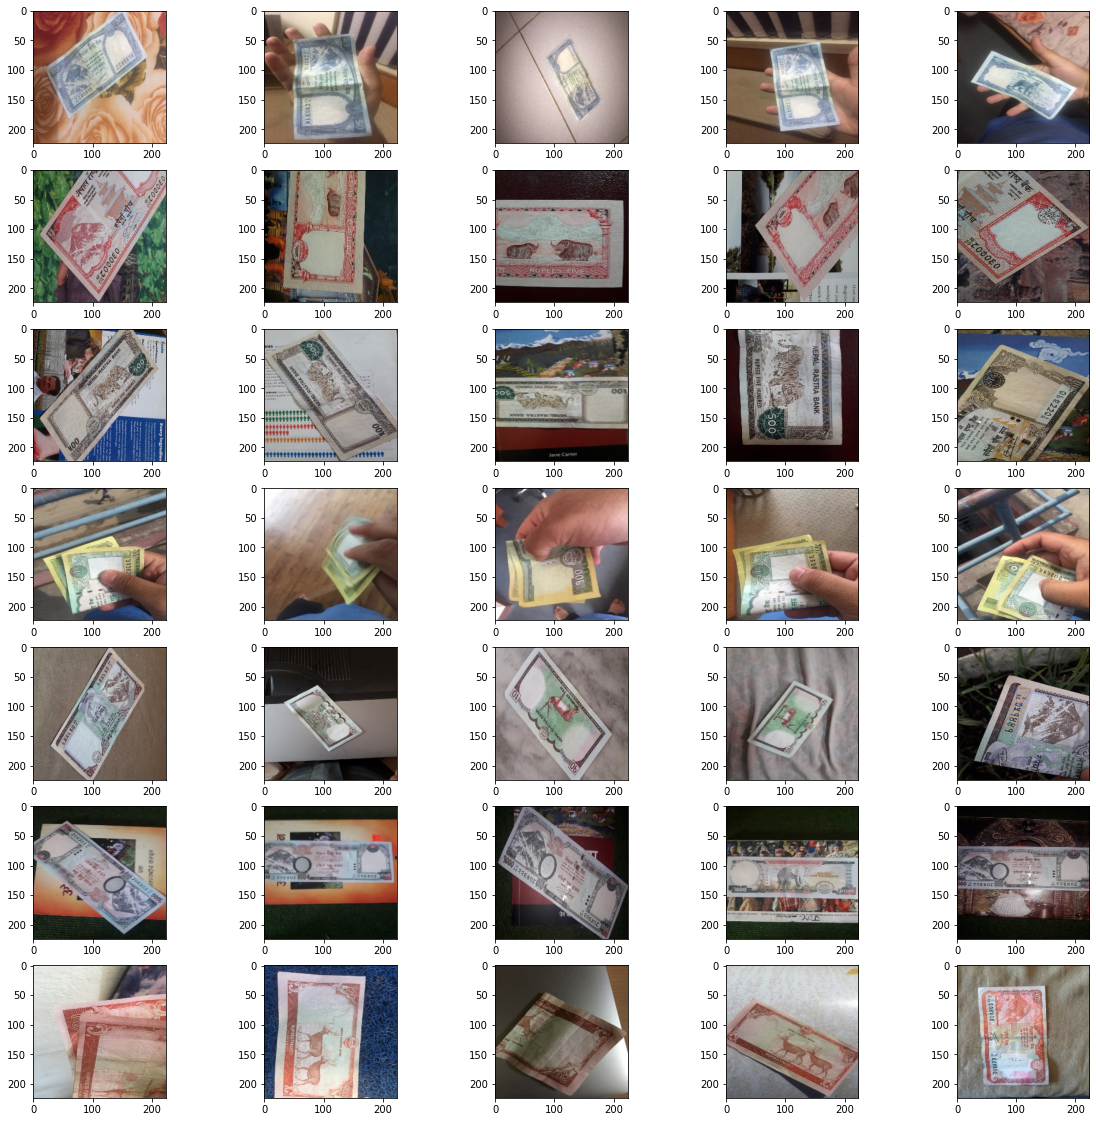

In [ ]:
visualize_images(validation_image_paths)

In [ ]:
def get_shapes(data_dir):
  dict = {}
  for category in categories:
    path = os.path.join(data_dir,category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      shapes = img_array.shape
      if shapes not in dict:
        dict[shapes] = 1
      else:
        dict[shapes] += 1
  return dict


In [ ]:
get_shapes(data_dir=valid_dir)

{(224, 224, 3): 3334}

In [ ]:
get_shapes(data_dir=train_dir)

{(224, 224, 3): 16892}

In [ ]:
# Loading the Data Generators

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array

train_datagen = ImageDataGenerator(rescale=1./ 255)
valid_datagen = ImageDataGenerator(rescale=1./ 255)

In [ ]:
train_generator = train_datagen.flow_from_directory('./dataset/train',target_size=(480,480),batch_size=25,class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('./dataset/valid',target_size=(480,480),batch_size=25,class_mode='categorical')

Found 16892 images belonging to 7 classes.
Found 3334 images belonging to 7 classes.


In [ ]:
# Building the model

from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [ ]:
img_height = 480
img_width = 480
inception = InceptionV3(weights='imagenet',include_top=False,input_shape=(img_height,img_width,3))

In [ ]:
inception.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(inception.layers))

# Fine-tune from this layer onwards
fine_tune_at = 75

# Freeze all the layers before the `fine_tune_at` layer
for layer in inception.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


In [ ]:
print(inception.output)

Tensor("mixed10_1/concat:0", shape=(None, 13, 13, 2048), dtype=float32)


In [ ]:
output = Flatten()(inception.output)
output = Dropout(0.75)(output)
prediction = Dense(7,activation='softmax')(output)

In [ ]:
model = Model(inputs = inception.input,outputs = prediction)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 239, 239, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 239, 239, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 239, 239, 32) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
),
  metrics=['accuracy']
)

In [ ]:
# !rm -rf "/content/nepali-rupees-collection.zip"
# !rm -rf "/content/model_weights"

In [ ]:
import os
os.mkdir('/content/model_weights/')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model_checkpoint = ModelCheckpoint('./model_weights/nepalese_currency_recognition_model_{epoch:02d}-{val_loss:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)
# checkpointer = ModelCheckpoint(filepath = 'model_zero7.{epoch:02d}-{val_loss:.6f}.hdf5',
#                                verbose=1,
#                                save_best_only=True, save_weights_only = True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0000001, verbose=1,cooldown=0)

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch = len(train_generator) //25,epochs = 150,validation_data = valid_generator,validation_steps = len(valid_generator) //25,callbacks=[model_checkpoint,reduce_lr])

Epoch 1/150
27/27 [==============================] - 59s 2s/step - loss: 2.2076 - accuracy: 0.3111 - val_loss: 2.1356 - val_accuracy: 0.2480

Epoch 00001: val_loss improved from 2.21797 to 2.13556, saving model to ./model_weights/nepalese_currency_recognition_model_01-2.135564.h5
Epoch 2/150
27/27 [==============================] - 56s 2s/step - loss: 1.9618 - accuracy: 0.3852 - val_loss: 1.5488 - val_accuracy: 0.4080

Epoch 00002: val_loss improved from 2.13556 to 1.54880, saving model to ./model_weights/nepalese_currency_recognition_model_02-1.548798.h5
Epoch 3/150
27/27 [==============================] - 56s 2s/step - loss: 1.6215 - accuracy: 0.4785 - val_loss: 1.2295 - val_accuracy: 0.4560

Epoch 00003: val_loss improved from 1.54880 to 1.22947, saving model to ./model_weights/nepalese_currency_recognition_model_03-1.229473.h5
Epoch 4/150
27/27 [==============================] - 56s 2s/step - loss: 1.4526 - accuracy: 0.5200 - val_loss: 1.3898 - val_accuracy: 0.4880

Epoch 00004: va

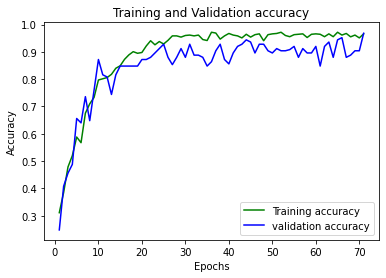

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy'][:71]
val_accuracy = history.history['val_accuracy'][:71]
epochs = range(1,72)
plt.plot(epochs,train_accuracy,'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


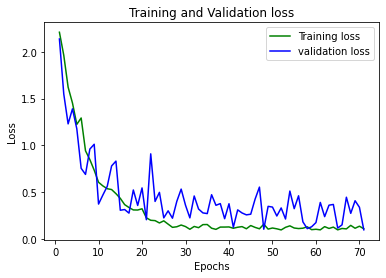

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['loss'][:71]
val_accuracy = history.history['val_loss'][:71]
epochs = range(1,72)
plt.plot(epochs,train_accuracy,'g', label='Training loss')
plt.plot(epochs, val_accuracy, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# At epoch 71, model seems to converge very well...with (training loss: 0.1098 - training accuracy: 0.9659 - val_loss: 0.0989 - val_accuracy: 0.9680)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("nepalese_currency_recognition_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("nepalese_currency_recognition_model.h5")
# print("Saved model to disk")
 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!cp -r "/content/model_weights/nepalese_currency_recognition_model_71-0.098882.h5" "/content/gdrive/My Drive/Artificial Intelligence"
!cp -r "/content/nepalese_currency_recognition_model.json" "/content/gdrive/My Drive/Artificial Intelligence"

In [ ]:
# Load model and make predictions
from keras.models import model_from_json

In [77]:
 # load json and create model
json_file = open('/content/nepalese_currency_recognition_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model_weights/nepalese_currency_recognition_model_71-0.098882.h5")
print("Loaded model from disk")


Loaded model from disk


In [78]:
Currencies = ['fifty','five','fivehundred','hundred','ten','thousand','twenty']

In [113]:
import cv2
import numpy as np
fifty_test_img = cv2.imread('/content/dataset/valid/fivehundred/fivehun_valid_149.jpg')
resized_img = cv2.resize(fifty_test_img,(480,480))
img = np.expand_dims(resized_img,axis=0)
scaled_img = img/ 255.0
prediction = loaded_model.predict(scaled_img)
prediction_class = np.argmax(prediction)
result = Currencies[prediction_class]
print(result)

fivehundred


In [98]:
from keras.preprocessing import image

In [101]:
def check_currency(path,currency):
  predictor = {}
  path= os.path.join(path,currency)
  for img in os.listdir(path):
    img = image.load_img(os.path.join(path,img),target_size=(480,480))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = img / 255.0
    prediction = loaded_model.predict(img)
    prediction_class  = np.argmax(prediction)
    result = Currencies[prediction_class]
    if result not in predictor:
      predictor[result] = 1
    else:
      predictor[result] += 1
  return predictor



In [108]:
check_currency(valid_dir,Currencies[5])

{'fivehundred': 2, 'hundred': 4, 'ten': 1, 'thousand': 494}

In [109]:
515 + 501 + 501 + 521 + 445 + 501 + 350 

3334

In [110]:
450 + 501 + 487 + 409 + 339 + 494 + 323

3003

In [111]:
(3003/3334)* 100

90.07198560287942